# Patterns in life's use of major enzymatic reaction classes
## Dylan Gagler, Arizona State University

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import json
sns.set()

# Introduction

A driving question in astrobiology is whether the structure and diversity of life we see on Earth is the result of chemical and evolutionary **contingency**, or the manifestation of **underlying organizational principles**. The realization of such principles would inform attempts at *synthesizing life* in the laboratory, *searching for life in the universe*, and understanding *how life may have originally emerged* on Earth. 

My research aims to categorize enzymatic biochemistry on a planetary-scale. Enzymes carry out the vast majority of a cell's functions, so understanding the distribution of life's use of enzymes will provide insight into life's biochemical function in general. In the era of big data, databases containing massive amounts of biological data from around the globe span levels of ecological organization, making it possible to investigate life on a planetary scale. 


# Hypothesis

I hypothesize that **1. different domains** of life will have **different distributions** of major enzyme classes, **2. different levels of biological organization** (individual genomes vs. communal metagenomes) will have different distributions of major enzyme classes, **3. certain EC classes are more enriched** in larger genomes/metagenomes than other EC classes.

![](IMG_logo.png)

To investigate this, I utilize the Department of Energy Joint Genome Institute's Integrated Microbial Genomes and Metagenomes database (JGI IMG/M). Among other things, the database contains a huge amount of **genomes** taken from organisms across the tree of life and a wide variety of **metagenomes**, which can be thought of as the blended result of a community of genomes. 

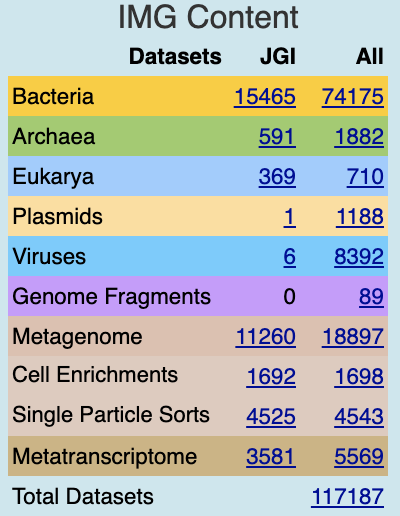

Most of the samples in JGI are equipped with *useful genetic and biochemical metadata*, such as the total number of protein coding genes and the number and types of enzymes that a given genome or metagenome encodes for. So, the goal then is to acquire as much enzymatic (and genetic) metadata as I can for as many genomes and metagenomes as I can!

# Enzymes as EC numbers

A brief note about enzymes. The *Nomenclature Committee of the International Union of Biochemistry and Molecular Biology* employs a *hierarchical four-digit number system* to classify enzymes into enzyme commission **(EC) numbers**, defined by the reactions they catalye. 

In this system, the first digit refers to one of the primary enzyme classes (oxidoreductases, transferases, hydrolases, lyases, isomerases, ligases, and translocases). Subsequent digits refer to the specific substrates that a given enzyme acts on. An example enzyme is 1.1.1.1, alcohol dehydrogenase. The first digit refers to oxidoreductases, which transfer electrons. The second digit refers to oxidoreductases which act on CH-OH electron donors and the third digit refers to NAD(P) electron donors. The final digit refers to alcohol dehydrogenase, specifically, as many enzymes fall into the class of "catalyzing electron transfers using CH-OH electron donors and NAD(P) as an electron acceptor".

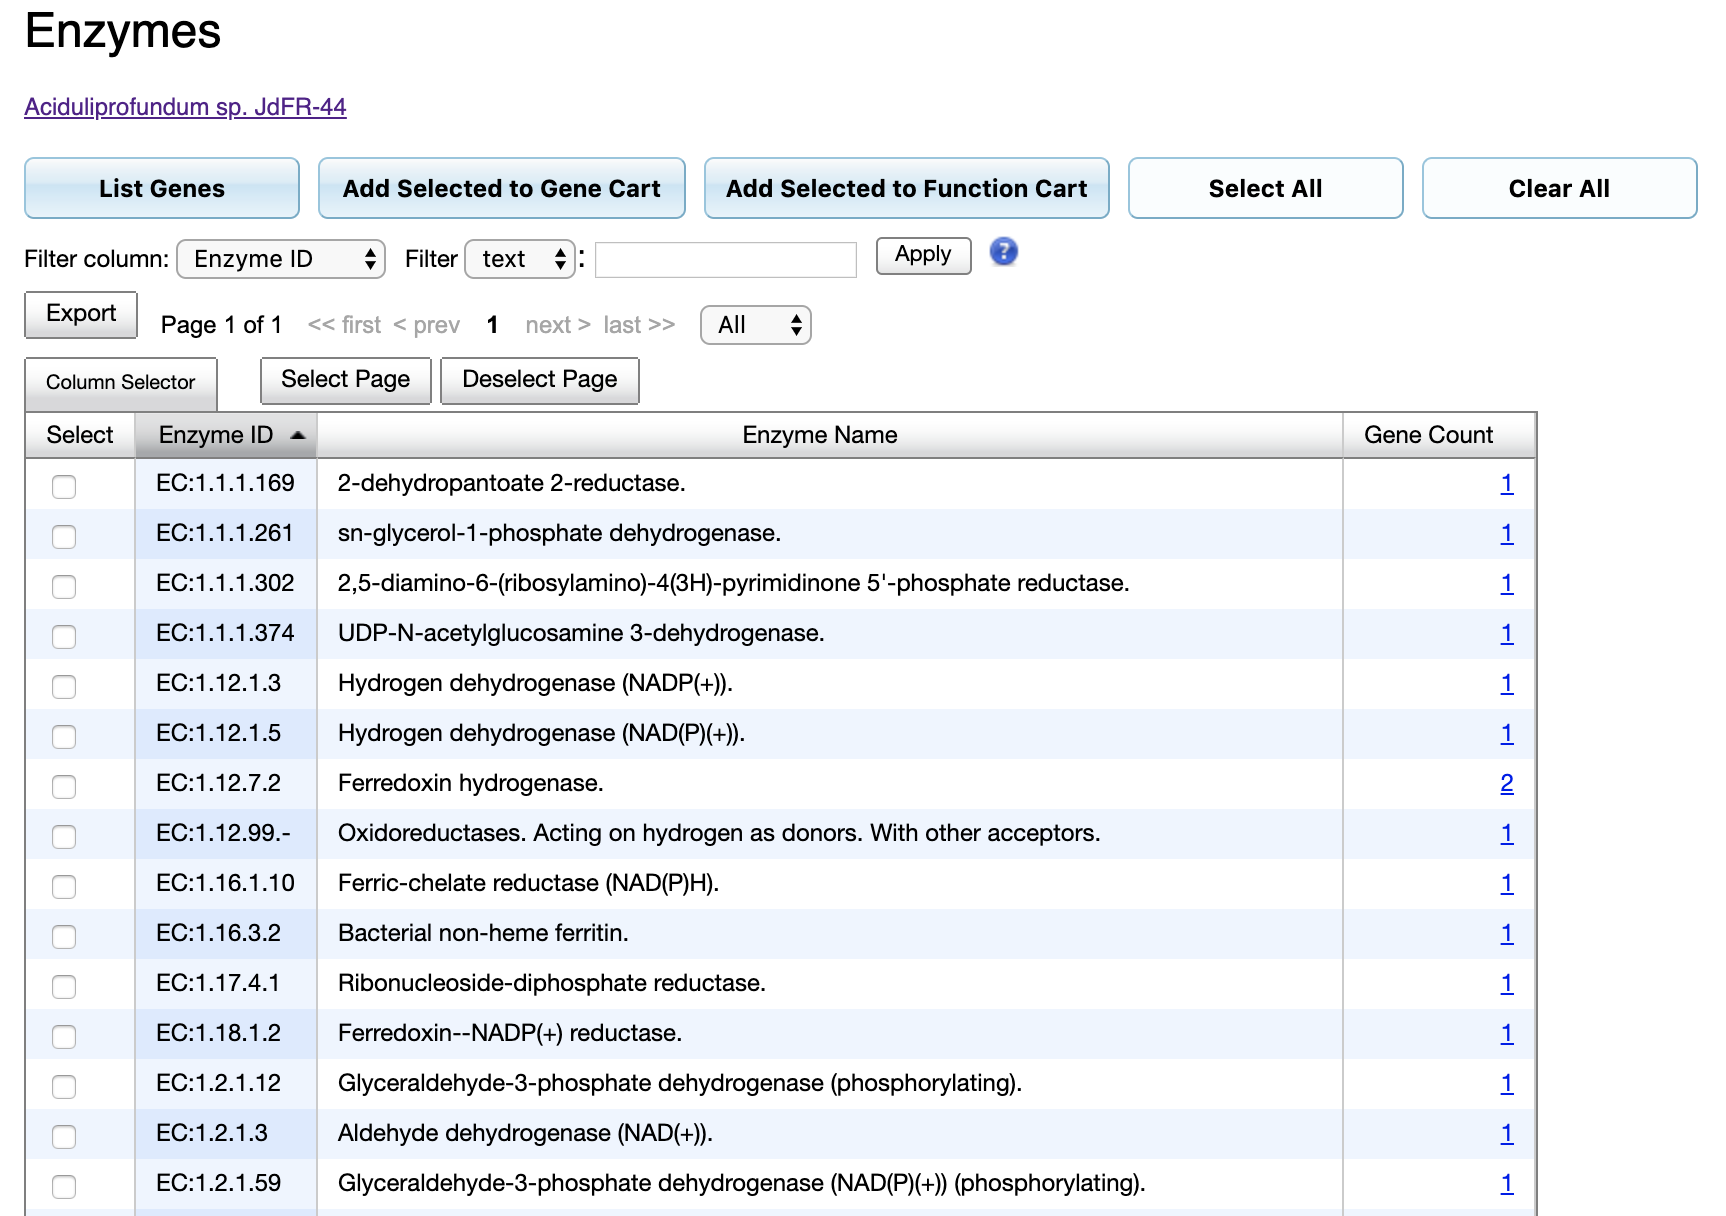

Unfortunately, however, IMG does not offer a way to download metadata in bulk, so other means must be employed. To get the data in the quantities that would be useful for developing a planetary-scale viewpoint of life, I utilized a web scraping script.

This script would go onto the main IMG webpage, access the list of genomes/metagenomes of interest, click on each individual sample, pull relevant metadata and genetic statistics, click on each individual sample's list of enzymes, and then create an output json file comprised of the metadata, genetic statistics, and enzyme list.

Each genome/metagenome is designated by JGI with a Taxon ID. Below is an example of what a file output by the scraping script.

In [2]:
with open('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/taxon_ids/640281011.json', 'r') as f:
    data = json.load(f)

# Data Processing and Biochemical Inference

I then process these json files into smaller json files. One for metadata, one for genetic statistics, and one for enzymes. With the now isolated enzyme jsons in hand, I turn to the Kyoto Encyclopedia of Genes and Genomes, to infer the biochemical capabilities for each taxon.

The KEGG Reaction database contains information about each EC number and the reactions, designated by a reaction ID (e.g. R00623), that they catalyze. Furthermore, the KEGG Reaction database contains information about the compounds involved in each reaction. Using this linkage between ECs, reactions, and compounds, I am able to create lists of reactions and compounds associated with each genome/metagenome.

In addition, I process the raw list of ECs for each taxon into the total number of ECs, the number of each major EC category, and the fraction of ECs that fall into each category. Then, I take all this information and put it into a pandas dataframe. I make a similar dataframe from the genetic statistics information and then create a central df for each taxon.

In [3]:
df = pd.read_csv('/Users/dgagler/Desktop/eukarya_core_df.csv')
df.head()

,Unnamed: 0,Domain,Genome Size,Gene Count,#cpds,#rxns,ec1,ec2,ec3,ec4,...,Protein coding genes connected to KEGG Orthology (KO) (count),Protein coding genes connected to KEGG Orthology (KO) (%),#ecs,ec1 fracs,ec2 fracs,ec3 fracs,ec4 fracs,ec5 fracs,ec6 fracs,ec7 fracs
0,2582581600,Eukaryota,16028,5,2056,2207,274,416,271,102,...,NaN,NaN,1195,0.229289,0.348117,0.226778,0.085356,0.055230,0.055230,0.0
1,2761201870,Eukaryota,30996486,11858,1848,1850,211,315,231,84,...,3247.0,27.38,946,0.223044,0.332981,0.244186,0.088795,0.042283,0.068710,0.0
2,2761201793,Eukaryota,87248952,29331,1716,1727,184,311,234,76,...,4064.0,13.86,902,0.203991,0.344789,0.259424,0.084257,0.038803,0.068736,0.0
3,2582581673,Eukaryota,10619,4,1671,1660,191,314,221,77,...,NaN,NaN,899,0.212458,0.349277,0.245829,0.085651,0.037820,0.068966,0.0
4,2761201684,Eukaryota,39754645,13774,1635,1620,177,308,215,70,...,3384.0,24.57,863,0.205098,0.356895,0.249131,0.081112,0.035921,0.071842,0.0


# Visualization

Using this dataframe, I visualize the data in various ways to make sense of this massive repository of genetic and biochemical information. Below are a few examples.

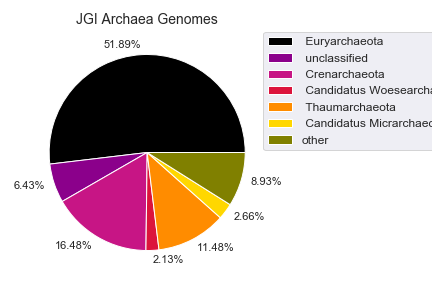

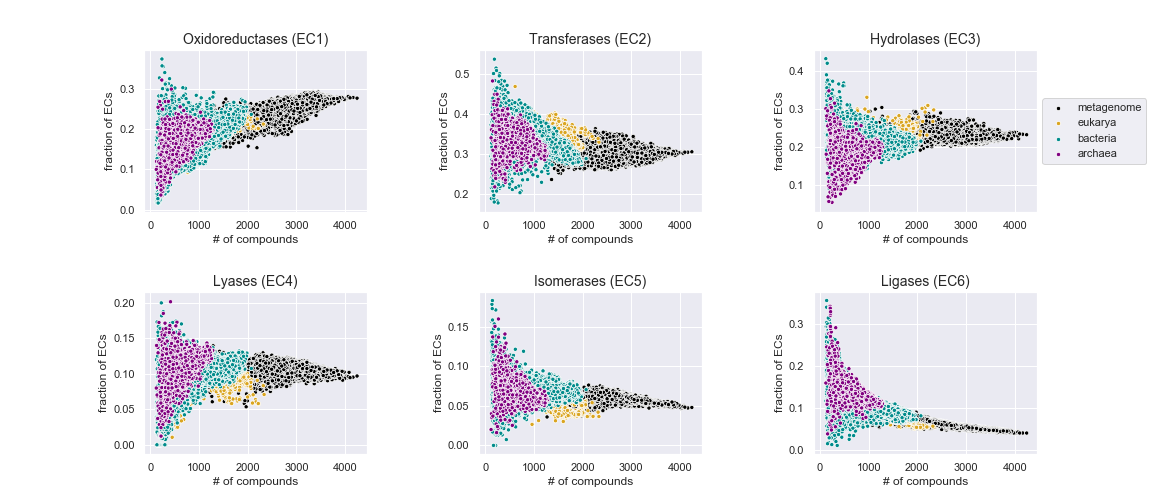

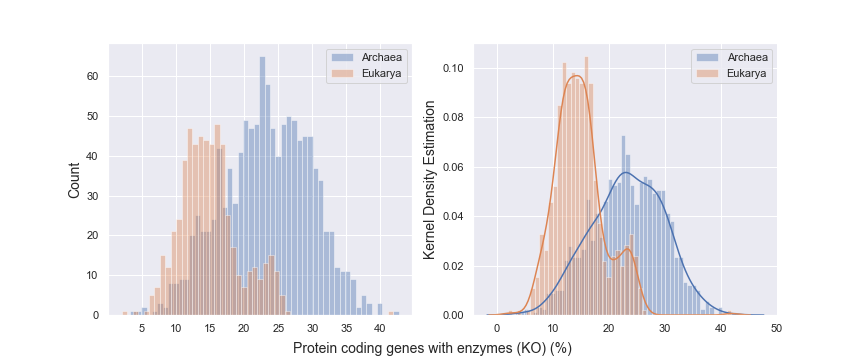

# Results interpretation

Pending